# The Spark Fiundation: Data Science and Business Analytics Internship

## Task2 : Prediction using Unsupervised Machine Leaning

From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 

## Author - Soni Mrunaliben

Step1 - Importing the dataset

In this step i will be importing the required libraries and dataset with the help of pandas libraby

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head() # it give us the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


step2- visualization tha data

In this step we will try to visualize the dataset

In [4]:
iris_data.shape # It give us the dimensions of the dataset

(150, 6)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


By seeing info() I can say that their no null  values present in the data set.

 ### Here species in the independent variable 

In [6]:
iris_data.describe() # Description of the nueric variable present in a dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# now we will drop the label column because it a n unsupervised learning problem
iris_df = pd.DataFrame(iris_data)
df = iris_df.drop(columns = ['Species','Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step3- Finding the optimum number of cluster

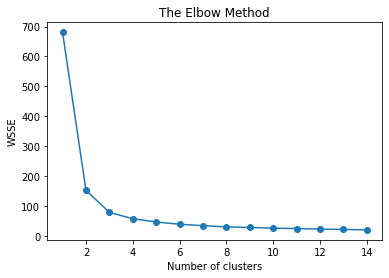

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []#within the cluster sum of square error) 
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(df)
    wsse.append(kmeans.inertia_) #the wsse value will be noted down
plt.plot(range(1, 15), wsse)
plt.scatter(range(1, 15),wsse)#to get the dot
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

From this I can choose the number of cluster as '3'

Step4- Applying the K-means clustering on the data

In [10]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3,  random_state = 10)
Y_pred = kmeans.fit_predict(df) 

In [11]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
kmeans.n_iter_ #total number of iteration is required to get the model fitted

5

Step5- Visualising the Clusters

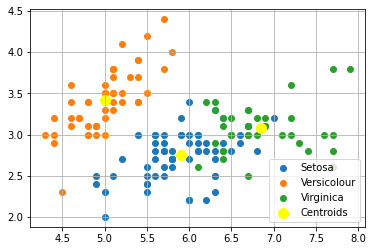

In [13]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[Y_pred == 0, 0], x[Y_pred == 0, 1], label = 'Setosa')
plt.scatter(x[Y_pred == 1, 0], x[Y_pred == 1, 1], label = 'Versicolour')
plt.scatter(x[Y_pred == 2, 0], x[Y_pred == 2, 1], label = 'Virginica')

# Plotting the cluster centers

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()
